# 날씨데이터 분석
## 1. 라이브러리 불러오기


#### 경고무시

In [6]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [7]:
pd.set_option('mode.chained_assignment',  None)

## 2. 데이터 탐색하기

In [8]:
data1 = pd.read_excel('data/20211121_20221122날씨.xlsx')
data2 = pd.read_excel('data/20201121_20211121.xlsx')
data3 = pd.read_excel('data/20191121_20201120.xlsx')
data4 = pd.read_excel('data/20181121_20191120.xlsx')
data5 = pd.read_excel('data/20171121_20181120.xlsx')

### ◈ 데이터 합치기
#### ◆  2017~2022 ( 현재 ) 데이터 합치기

In [9]:
# 데이터 합치기 concat
data=pd.concat([data1,data2,data3,data4,data5])
data

,지점,지점명,일시,기온(°C),강수량(mm),습도(%),이슬점온도(°C),적설(cm),3시간신적설(cm)
0,108,서울,2021-11-22 01:00:00,6.8,NaN,85.0,4.4,NaN,NaN
1,108,서울,2021-11-22 02:00:00,6.3,NaN,88.0,4.4,NaN,NaN
2,108,서울,2021-11-22 03:00:00,6.5,1.3,83.0,3.8,NaN,NaN
3,108,서울,2021-11-22 04:00:00,5.6,NaN,75.0,1.5,NaN,NaN
4,108,서울,2021-11-22 05:00:00,4.5,NaN,65.0,-1.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...
8731,108,서울,2018-11-19 20:00:00,6.0,NaN,50.0,NaN,NaN,NaN
8732,108,서울,2018-11-19 21:00:00,5.8,NaN,44.0,NaN,NaN,NaN
8733,108,서울,2018-11-19 22:00:00,5.3,NaN,39.0,NaN,NaN,NaN
8734,108,서울,2018-11-19 23:00:00,4.2,NaN,42.0,NaN,NaN,NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43728 entries, 0 to 8735
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   지점          43728 non-null  int64         
 1   지점명         43728 non-null  object        
 2   일시          43728 non-null  datetime64[ns]
 3   기온(°C)      43726 non-null  float64       
 4   강수량(mm)     4671 non-null   float64       
 5   습도(%)       43728 non-null  float64       
 6   이슬점온도(°C)   8736 non-null   float64       
 7   적설(cm)      1272 non-null   float64       
 8   3시간신적설(cm)  119 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 3.3+ MB


### ◈ 데이터 정리하기

In [11]:
# 최신 날짜 순으로 데이터 정렬
data=data.sort_values(by='일시', ascending = False)

In [12]:
# '지점' 컬럼 삭제
data = data.drop(columns= '지점')

In [13]:
# '이슬점온도' 컬럼 삭제
data = data.drop(columns = '이슬점온도(°C)')

In [14]:
data

,지점명,일시,기온(°C),강수량(mm),습도(%),적설(cm),3시간신적설(cm)
8735,서울,2022-11-21 00:00:00,11.2,NaN,65.0,NaN,NaN
8734,서울,2022-11-20 23:00:00,11.8,NaN,63.0,NaN,NaN
8733,서울,2022-11-20 22:00:00,12.2,NaN,60.0,NaN,NaN
8732,서울,2022-11-20 21:00:00,13.1,NaN,57.0,NaN,NaN
8731,서울,2022-11-20 20:00:00,13.8,NaN,56.0,NaN,NaN
...,...,...,...,...,...,...,...
4,서울,2017-11-21 05:00:00,-3.5,NaN,73.0,NaN,NaN
3,서울,2017-11-21 04:00:00,-3.3,NaN,76.0,NaN,NaN
2,서울,2017-11-21 03:00:00,-2.9,NaN,77.0,NaN,NaN
1,서울,2017-11-21 02:00:00,-2.9,NaN,74.0,NaN,NaN


## 3. 데이터 분석하기
### ◈ 비가 오는 날만 보기

In [15]:
rain=data[data['강수량(mm)'].notnull()]
rain

,지점명,일시,기온(°C),강수량(mm),습도(%),적설(cm),3시간신적설(cm)
8615,서울,2022-11-16 00:00:00,6.9,0.0,92.0,NaN,NaN
8612,서울,2022-11-15 21:00:00,8.0,1.6,88.0,NaN,NaN
8606,서울,2022-11-15 15:00:00,11.7,0.0,73.0,NaN,NaN
8543,서울,2022-11-13 00:00:00,17.3,19.4,97.0,NaN,NaN
8540,서울,2022-11-12 21:00:00,18.2,29.5,100.0,NaN,NaN
...,...,...,...,...,...,...,...
71,서울,2017-11-24 00:00:00,-0.4,1.2,90.0,1.5,1.5
62,서울,2017-11-23 15:00:00,4.5,0.0,38.0,NaN,NaN
59,서울,2017-11-23 12:00:00,3.0,0.0,49.0,NaN,NaN
56,서울,2017-11-23 09:00:00,0.4,0.0,40.0,NaN,NaN


In [16]:
# 컬럼 중 ()가 있는 것이 종종 오류가 생겨 컬럼명 변경
rain.rename(columns={'강수량(mm)':'강수량','습도(%)':'습도','적설(cm)':'적설','3시간신적설(cm)':'3시간신적설','기온(°C)':'기온'},inplace=True)
data.rename(columns={'강수량(mm)':'강수량','습도(%)':'습도','적설(cm)':'적설','3시간신적설(cm)':'3시간신적설','기온(°C)':'기온'},inplace=True)


#### ◆ 강수량별로 데이터 보기

In [17]:
# 강수량이 0.0 인 것이 있어 0.0 이상인 것만~..
rain[rain.강수량 > 0.0]

,지점명,일시,기온,강수량,습도,적설,3시간신적설
8612,서울,2022-11-15 21:00:00,8.0,1.6,88.0,NaN,NaN
8543,서울,2022-11-13 00:00:00,17.3,19.4,97.0,NaN,NaN
8540,서울,2022-11-12 21:00:00,18.2,29.5,100.0,NaN,NaN
8537,서울,2022-11-12 18:00:00,17.1,6.7,90.0,NaN,NaN
8534,서울,2022-11-12 15:00:00,19.5,2.3,77.0,NaN,NaN
...,...,...,...,...,...,...,...
113,서울,2017-11-25 18:00:00,6.6,18.5,91.0,NaN,NaN
110,서울,2017-11-25 15:00:00,5.1,3.5,87.0,NaN,NaN
107,서울,2017-11-25 12:00:00,4.1,0.5,73.0,NaN,NaN
71,서울,2017-11-24 00:00:00,-0.4,1.2,90.0,1.5,1.5


In [18]:
# 강수량이 0.1 ~ 1.0 (mm) 일 때
data[(data['강수량']>=0.1) & (data['강수량']<1.0)]

,지점명,일시,기온,강수량,습도,적설,3시간신적설
7720,서울,2022-10-09 17:00:00,13.6,0.9,95.0,NaN,NaN
7714,서울,2022-10-09 11:00:00,14.0,0.3,82.0,NaN,NaN
7712,서울,2022-10-09 09:00:00,14.0,0.3,76.0,NaN,NaN
7612,서울,2022-10-05 05:00:00,14.2,0.1,92.0,NaN,NaN
7586,서울,2022-10-04 03:00:00,21.3,0.3,96.0,NaN,NaN
...,...,...,...,...,...,...,...
317,서울,2017-12-04 06:00:00,1.2,0.1,76.0,NaN,NaN
290,서울,2017-12-03 03:00:00,3.4,0.5,71.0,NaN,NaN
191,서울,2017-11-29 00:00:00,8.0,0.5,87.0,NaN,NaN
107,서울,2017-11-25 12:00:00,4.1,0.5,73.0,NaN,NaN


In [19]:
# 강수량이 1 ~ 3 (mm) 일 때
data[(data['강수량']>=1.0) & (data['강수량'] < 3.0)]

,지점명,일시,기온,강수량,습도,적설,3시간신적설
8612,서울,2022-11-15 21:00:00,8.0,1.6,88.0,NaN,NaN
8534,서울,2022-11-12 15:00:00,19.5,2.3,77.0,NaN,NaN
7724,서울,2022-10-09 21:00:00,11.0,1.1,94.0,NaN,NaN
7723,서울,2022-10-09 20:00:00,11.1,1.5,94.0,NaN,NaN
7721,서울,2022-10-09 18:00:00,13.5,1.6,97.0,NaN,NaN
...,...,...,...,...,...,...,...
461,서울,2017-12-10 06:00:00,-0.5,2.5,90.0,2.7,2.7
296,서울,2017-12-03 09:00:00,3.5,2.5,91.0,NaN,NaN
293,서울,2017-12-03 06:00:00,3.4,1.0,86.0,NaN,NaN
116,서울,2017-11-25 21:00:00,7.2,1.5,91.0,NaN,NaN


In [20]:
# 강수량이 3 ~ 5 (mm) 일 때
data[(data['강수량']>=3.0) & (data['강수량'] < 5.0)]

,지점명,일시,기온,강수량,습도,적설,3시간신적설
7722,서울,2022-10-09 19:00:00,13.0,3.8,96.0,NaN,NaN
7564,서울,2022-10-03 05:00:00,18.4,3.2,100.0,NaN,NaN
7563,서울,2022-10-03 04:00:00,18.2,3.5,99.0,NaN,NaN
7562,서울,2022-10-03 03:00:00,18.0,4.4,99.0,NaN,NaN
7558,서울,2022-10-02 23:00:00,17.3,3.3,97.0,NaN,NaN
...,...,...,...,...,...,...,...
2390,서울,2018-02-28 15:00:00,4.8,4.5,87.0,NaN,NaN
2258,서울,2018-02-23 03:00:00,0.9,3.7,97.0,4.1,3.7
1505,서울,2018-01-22 18:00:00,1.1,3.3,96.0,1.0,1.0
806,서울,2017-12-24 15:00:00,2.9,3.5,90.0,NaN,NaN


In [21]:
# 강수량이 5 ~ 10 (mm) 일 때
data[(data['강수량']>=5.0) & (data['강수량'] < 10.0)]

,지점명,일시,기온,강수량,습도,적설,3시간신적설
8537,서울,2022-11-12 18:00:00,17.1,6.7,90.0,NaN,NaN
7585,서울,2022-10-04 02:00:00,21.8,5.4,98.0,NaN,NaN
7584,서울,2022-10-04 01:00:00,22.4,6.1,99.0,NaN,NaN
7583,서울,2022-10-04 00:00:00,23.0,7.9,100.0,NaN,NaN
7581,서울,2022-10-03 22:00:00,23.1,5.6,96.0,NaN,NaN
...,...,...,...,...,...,...,...
2495,서울,2018-03-05 00:00:00,7.6,9.0,88.0,NaN,NaN
2396,서울,2018-02-28 21:00:00,2.4,9.0,95.0,NaN,NaN
2393,서울,2018-02-28 18:00:00,3.6,9.5,90.0,NaN,NaN
803,서울,2017-12-24 12:00:00,4.1,9.5,91.0,NaN,NaN


In [22]:
# 강수가 10mm 이상일 때
data[(data['강수량']>=10.0)]

,지점명,일시,기온,강수량,습도,적설,3시간신적설
8543,서울,2022-11-13 00:00:00,17.3,19.4,97.0,NaN,NaN
8540,서울,2022-11-12 21:00:00,18.2,29.5,100.0,NaN,NaN
7582,서울,2022-10-03 23:00:00,22.8,10.5,99.0,NaN,NaN
7571,서울,2022-10-03 12:00:00,22.3,10.9,100.0,NaN,NaN
6900,서울,2022-09-05 13:00:00,18.8,10.0,98.0,NaN,NaN
...,...,...,...,...,...,...,...
4255,서울,2018-05-17 08:00:00,19.7,13.5,98.0,NaN,NaN
4251,서울,2018-05-17 04:00:00,19.2,19.0,98.0,NaN,NaN
4236,서울,2018-05-16 13:00:00,21.8,35.0,97.0,NaN,NaN
2744,서울,2018-03-15 09:00:00,14.1,17.0,98.0,NaN,NaN


### ◈ 눈이 내리는 날만 보기

In [23]:
snow=data[data['적설'].notnull()]

## 4. 데이터 시각화
#### 강수량, 적설

In [24]:
# 데이터 시각화
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  

### ◈ 2021년 데이터만 뽑아보기

In [25]:
# 강수량 일별 데이터 만들기
비 = data.pivot_table(index = '일시', aggfunc = 'mean', values = '강수량')
강수 = 비.resample('D')['강수량'].mean()
강수
강수 = 강수.to_frame()
target_year = 2021
rain21 = 강수.query('일시.dt.year == @target_year')

In [26]:
rain21.reset_index(inplace=True)

In [27]:
# 눈 일별 데이터 만들기
눈 = data.pivot_table(index = '일시', aggfunc = 'mean', values = ['적설','3시간신적설'])
적설 = 눈.resample('D')['적설','3시간신적설'].mean()
target_year = 2021
snow21 = 적설.query('일시.dt.year == @target_year')

In [28]:
snow21.reset_index(inplace=True)

###  ◆ 강수량 시각화

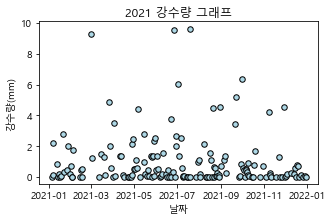

In [29]:
list_x = rain21.일시

list_y = rain21.강수량

fig = plt.figure(figsize=(5,3))

plt.scatter(list_x, list_y,
            marker='o',
            s=30,
            c='lightblue',
            edgecolors='black')

plt.title('2021 강수량 그래프')
plt.xlabel('날짜')
plt.ylabel('강수량(mm)')
plt.savefig('강수량그래프.png', transparent = True)

###  ◆ 적설 시각화

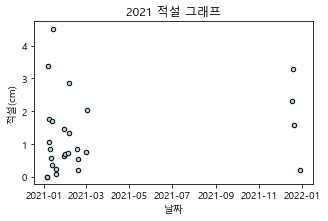

In [30]:
list_x = snow21.일시
list_y = snow21.적설

fig = plt.figure(figsize=(5,3))

plt.scatter(list_x, list_y,
            marker='o',
            s=20,
            c='lightblue',
            edgecolors='black')

plt.title('2021 적설 그래프')
plt.xlabel('날짜')
plt.ylabel('적설(cm)')
plt.savefig('적설그래프.png', transparent = True)

## 5. 눈, 비 데이터 내보내기
2021년도 비, 눈 내린 날만 엑셀파일로 내보내기

In [31]:
rain = data[data['강수량']>0.0]
rain = rain[['일시','강수량']]
rain21 = rain[(rain['일시'] >= '2021-01-01')&(rain['일시'] <= '2021-12-31')]
rain21['날짜'] = rain21['일시'].dt.date
rain21.drop(columns='일시', axis=1, inplace=True)
rain21 = rain21.pivot_table(index=['날짜'], values='강수량', aggfunc='sum')

In [32]:
snow = data[data['적설']>0.0]
snow = snow[['일시','적설']]
snow21 = snow[(snow['일시'] >= '2021-01-01')&(snow['일시'] <= '2021-12-31')]
snow21['날짜'] = snow21['일시'].dt.date
snow21.drop(columns='일시', axis=1, inplace=True)
snow21 = snow21.pivot_table(index=['날짜'], values='적설', aggfunc='sum')

In [33]:
rain21.to_excel('data/rain.xlsx')
snow21.to_excel('data/snow.xlsx')

## 6. 지하철 승하차 데이터 가져오기

In [34]:
일별승하차인원 = pd.read_excel('data/일별승하차인원.xlsx')

### 강수량, 적설 데이터 가져오기

In [35]:
강수량 = pd.read_excel('data/rain.xlsx')
적설 = pd.read_excel('data/snow.xlsx')

### ◈ 데이터 정리하기

In [36]:
# 일시 컬럼명을 날짜로 변경
강수량.rename(columns={'일시':'날짜'}, inplace=True)
적설.rename(columns={'일시':'날짜'}, inplace=True)

In [37]:
일별강수량 = 강수량.groupby("날짜")['강수량'].sum()
일별적설 = 적설.groupby("날짜")['적설'].sum()

In [38]:
# 승하차 인원수가 적은 순서로 바꾸기
일별승하차인원= 일별승하차인원.sort_values(by=['총인원수'])

## 7. 날씨 - 승하차 데이터 분석하기
### ◈ 데이터 합치기

In [39]:
# 승하차인원, 강수량, 적설 데이터 합치기
일별승하차인원시각화1 = pd.merge(일별승하차인원, 일별강수량, on="날짜", how='outer')
일별승하차인원시각화2 = pd.merge(일별승하차인원, 일별적설, on="날짜", how='outer')

In [40]:
비내리는날 = 일별승하차인원시각화1[일별승하차인원시각화1['강수량'].notnull()]
비내리는날.reset_index(drop=True,inplace=True)
비내리는날

,날짜,총인원수,강수량
0,2021-09-21,2220772,41.6
1,2021-08-01,2934763,20.3
2,2021-08-08,3100724,12.7
3,2021-07-11,3193615,0.4
4,2021-03-01,3318253,65.2
...,...,...,...
111,2021-05-21,8884044,7.2
112,2021-04-30,8933717,29.7
113,2021-11-10,8974234,0.3
114,2021-12-03,8975855,0.4


In [41]:
눈내리는날 = 일별승하차인원시각화2[일별승하차인원시각화2['적설'].notnull()]
눈내리는날.reset_index(drop=True,inplace=True)
눈내리는날

,날짜,총인원수,적설
0,2021-01-10,2508411,13.8
1,2021-01-17,2801740,0.3
2,2021-03-01,3318253,3.1
3,2021-01-09,3791819,20.5
4,2021-12-19,4172015,79.2
5,2021-01-30,4791718,1.4
6,2021-12-18,5739388,20.7
7,2021-01-08,6901565,25.3
8,2021-01-11,7021910,8.8
9,2021-01-06,7210889,13.5


## 8. 데이터 시각화
인원수 데이터가 거듭제곱으로 표현되는 거 방지하기 위해 10만으로 나누기

In [42]:
눈내리는날.총인원수 = 눈내리는날.총인원수/1000000.0
비내리는날.총인원수 = 비내리는날.총인원수/1000000.0

### ◈ 강수량-승하차 시각화

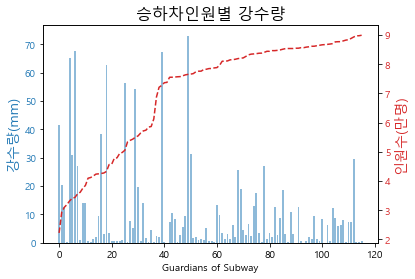

<Figure size 8640x5760 with 0 Axes>

In [43]:
# 시각화

fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(120, 80))
color_1 = 'tab:blue'
ax1.set_title('승하차인원별 강수량', fontsize=16)
ax1.set_xlabel('Guardians of Subway')
ax1.set_ylabel('강수량(mm)', fontsize=14, color=color_1)
ax1.bar(비내리는날.index, 비내리는날.강수량, label='Demand', alpha=0.5, width=0.7)
ax1.tick_params(axis='y', labelcolor=color_1)

# right side with different scale
ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:red'
ax2.set_ylabel('인원수(만명)', fontsize=14, color=color_2)
ax2.plot(비내리는날.index, 비내리는날.총인원수, color=color_2,linestyle='--')
ax2.tick_params(axis='y', labelcolor=color_2)

#plt.savefig('승하차-강수량그래프.png', transparent = True)

### ◈ 적설-승하차 시각화

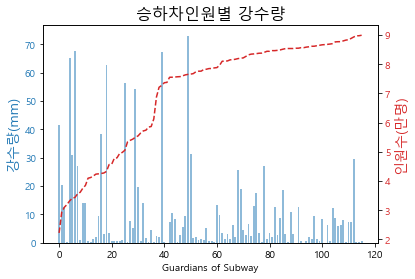

<Figure size 8640x5760 with 0 Axes>

In [44]:
# 시각화

fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(120, 80))
color_1 = 'tab:blue'
ax1.set_title('승하차인원별 강수량', fontsize=16)
ax1.set_xlabel('Guardians of Subway')
ax1.set_ylabel('강수량(mm)', fontsize=14, color=color_1)
ax1.bar(비내리는날.index, 비내리는날.강수량, label='Demand', alpha=0.5, width=0.7)
ax1.tick_params(axis='y', labelcolor=color_1)

# right side with different scale
ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:red'
ax2.set_ylabel('인원수(만명)', fontsize=14, color=color_2)
ax2.plot(비내리는날.index, 비내리는날.총인원수, color=color_2,linestyle='--')
ax2.tick_params(axis='y', labelcolor=color_2)

#plt.savefig('승하차-강수량그래프.png', transparent = True)

 ### 추가 ) 2018 눈 내리는 날 데이터 분석

In [45]:
data1 = pd.read_excel('data/20171121_20181120.xlsx')
data2 = pd.read_excel('data/20181121_20191120.xlsx')

In [46]:
data=pd.concat([data1,data2])

In [47]:
data = data.drop(columns=['지점','지점명','기온(°C)','3시간신적설(cm)'], axis=1)

In [48]:
data.rename(columns={'강수량(mm)':'강수량',"적설(cm)":'적설'},inplace=True)

In [49]:
data = data.drop(columns=['습도(%)'],axis=1)

In [50]:
snow = data[data['적설'].notnull()]

In [51]:
snow['날짜'] = snow['일시'].dt.date
snow=snow.drop(columns='일시',axis=1)

In [52]:
snow=snow.pivot_table(index = '날짜', aggfunc = 'sum', values = ['적설'])

In [53]:
snow.reset_index(inplace=True)

In [54]:
snow['날짜'] = pd.to_datetime(snow['날짜'])

In [55]:
snow18 = snow[(snow['날짜'] >= '2018-01-01') & (snow['날짜'] < '2019-01-01')]

In [ ]:
승하차 = pd.read_excel('data/서울교통공사 2018년 일별 역별 시간대별 승하차인원(1_8호선).xlsx',skiprows=[0])

In [ ]:
승하차.drop(['호선','05 ~ 06','06 ~ 07','07 ~ 08','16 ~ 17', '23 ~ 24','08 ~ 09','09 ~ 10','10 ~ 11','11 ~ 12','12 ~ 13','13 ~ 14','14 ~ 15','15 ~ 16'
                ,'17 ~ 18','18 ~ 19', '19 ~ 20', '20 ~ 21','21 ~ 22', '22 ~ 23', '00 ~ 01','역번호'], axis=1, inplace = True)

In [ ]:
승하차.drop(['역명'], axis = 1, inplace = True)

In [ ]:
일별승하차 = 승하차.pivot_table(index='날짜', values=['합 계'], aggfunc='sum')

In [ ]:
일별승하차 = pd.merge(일별승하차, snow18, on="날짜", how='outer')

In [ ]:
눈일별승하차 = 일별승하차[일별승하차['적설'].notnull()]

In [ ]:
눈일별승하차 = 눈일별승하차.reset_index(drop=True)

In [ ]:
눈일별승하차.rename(columns={'합 계':'총인원수'}, inplace=True)

In [ ]:
눈일별승하차.sort_values(by=['총인원수'], inplace=True)

In [ ]:
눈일별승하차 = 눈일별승하차.reset_index(drop=True)

In [ ]:
# 시각화

fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(120, 80))
color_1 = 'tab:blue'
ax1.set_title('2018 적설별 승하차인원', fontsize=16)
ax1.set_xlabel('Guardians of Subway')
ax1.set_ylabel('적설(cm)', fontsize=14, color=color_1)
ax1.bar(눈일별승하차.index, 눈일별승하차.적설, label='Demand', alpha=0.3, width=0.7)
ax1.tick_params(axis='y', labelcolor=color_1)

# right side with different scale
ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:red'
ax2.set_ylabel('인원수(만명)', fontsize=14, color=color_2)
ax2.plot(눈일별승하차.index, 눈일별승하차.총인원수, color=color_2,linestyle='--')
ax2.tick_params(axis='y', labelcolor=color_2)

plt.savefig('승하차-적설그래프.png', transparent = True)